# Задание
* Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
* Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки
* Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите вакансии с использованием python, которые вам интересны
* Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
* Постройте график наиболее востребованных навыков

In [2]:
import requests
from tqdm.auto import tqdm
import json          # Для обработки полученных результатов
import time          # Для задержки между запросами
import os            # Для работы с файлами
import csv
import pandas as pd  
from collections import defaultdict
from pandas import json_normalize


In [3]:
sber = '3529'
page = 1
num_per_page = 100
#moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'


In [ ]:
#res.text

In [5]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [6]:
res


<Response [200]>

In [7]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [10]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [43]:
vacs = vacancies.get('items')
print(vacs)

[{'id': '77705940', 'premium': False, 'name': 'Менеджер по работе с ключевыми клиентами', 'department': {'id': '3529-3529-prof', 'name': 'Сбер для экспертов'}, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1720', 'name': 'Гусь-Хрустальный', 'url': 'https://api.hh.ru/areas/1720'}, 'salary': {'from': 52000, 'to': None, 'currency': 'RUR', 'gross': True}, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': None, 'response_url': None, 'sort_point_distance': None, 'published_at': '2023-03-06T10:51:50+0300', 'created_at': '2023-03-06T10:51:50+0300', 'archived': False, 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=77705940', 'insider_interview': None, 'url': 'https://api.hh.ru/vacancies/77705940?host=hh.ru', 'adv_response_url': None, 'alternate_url': 'https://hh.ru/vacancy/77705940', 'relations': [], 'employer': {'id': '3529', 'name': 'СБЕР', 'url': 'https://api.hh.ru/employers/3529', 'alternate_url': 'https://hh.ru/employer/3529', 'logo_

In [22]:
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [23]:
len(all_vacancy_ids)

2000

In [33]:
vac_id = 78405583
url = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url)
vacancy= res.json()

In [34]:
vacancy

{'id': '78405583',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'QA engineer Junior (нагрузочное тестирование)',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '2',
  'name': 'Санкт-Петербург',
  'url': 'https://api.hh.ru/areas/2'},
 'salary': {'from': None, 'to': 47000, 'currency': 'RUR', 'gross': True},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'experience': {'id': 'noExperience', 'name': 'Нет опыта'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': {'id': '3529-3529-it', 'name': 'Сбер. IT'},
 'contacts': None,
 'description': '<p><strong>Команда нагрузочного тестирования расширяется, и сейчас мы ищем начинающего инженера по нагрузочному тестированию.</strong></p> <p><strong>Мы быстрорастущая команда, которая тестирует «Сбербанк Онлайн», «Мессенджер», «ЕФС». У нас Вы н

In [38]:
#этим куском поделились коллеги, т.к. я не поняла как можно было по другому достать поля c описанием и ключевыми навыками
vacancy_all_info = []
for ii in range(10): 
    x=70*ii
    ii+=1
    y=70*ii
    for i in range(x, y): 
        vac_id = all_vacancy_ids[i]
        url = f'https://api.hh.ru/vacancies/{vac_id}'
        res = requests.get(url)
        vacancy = res.json()
        vacancy_all_info.append(vacancy)
    print(ii)
    time.sleep(180)

1
2
3
4
5
6
7
8
9
10


In [39]:
all_vac_info = pd.DataFrame(vacancy_all_info, columns = ['id','name','description','published_at','key_skills'])

In [40]:
all_vac_info

,id,name,description,published_at,key_skills
0,78405583,QA engineer Junior (нагрузочное тестирование),<p><strong>Команда нагрузочного тестирования р...,2023-03-22T13:26:03+0300,[{'name': 'Нагрузочное тестирование'}]
1,78398724,Тестировщик (QA – engineer),<p><strong>Наш проект</strong> - возможность п...,2023-03-22T11:53:24+0300,[]
2,77873277,Стажер,<p>Мы приглашаем исследователей в области маши...,2023-03-10T11:13:27+0300,[]
3,78507522,Project manager,<p>Мы занимаемся построением рекомендательной ...,2023-03-24T13:15:24+0300,"[{'name': 'SQL'}, {'name': 'BPMN'}, {'name': '..."
4,75175324,Финансовый консультант,<p> </p> <p><strong>Финансовый консультант </s...,2023-03-14T11:22:39+0300,"[{'name': 'Деловое общение'}, {'name': 'Активн..."
...,...,...,...,...,...
695,78518147,Персональный менеджер СберПервый,<p>Сбер — лучший работодатель России. У нас бо...,2023-03-24T15:11:33+0300,[]
696,77463661,Старший менеджер по обслуживанию,<p>Сбер — лучший работодатель России. У нас бо...,2023-02-28T09:14:45+0300,[]
697,78398563,Старший специалист организационно-администрати...,<p>Сбер — лучший работодатель России. У нас 14...,2023-03-22T11:50:48+0300,[]
698,77836821,Менеджер по работе с партнерами жилищного кред...,<p>.</p> <p><strong>Обязанности</strong></p> <...,2023-03-09T14:27:35+0300,[]


In [47]:
all_vac_info['published_at'] = pd.to_datetime(all_vac_info['published_at'])
print (all_vac_info.dtypes)

id                                             object
name                                           object
description                                    object
published_at    datetime64[ns, pytz.FixedOffset(180)]
key_skills                                     object
dtype: object


In [48]:
all_vac_info


,id,name,description,published_at,key_skills
0,78405583,QA engineer Junior (нагрузочное тестирование),<p><strong>Команда нагрузочного тестирования р...,2023-03-22 13:26:03+03:00,[{'name': 'Нагрузочное тестирование'}]
1,78398724,Тестировщик (QA – engineer),<p><strong>Наш проект</strong> - возможность п...,2023-03-22 11:53:24+03:00,[]
2,77873277,Стажер,<p>Мы приглашаем исследователей в области маши...,2023-03-10 11:13:27+03:00,[]
3,78507522,Project manager,<p>Мы занимаемся построением рекомендательной ...,2023-03-24 13:15:24+03:00,"[{'name': 'SQL'}, {'name': 'BPMN'}, {'name': '..."
4,75175324,Финансовый консультант,<p> </p> <p><strong>Финансовый консультант </s...,2023-03-14 11:22:39+03:00,"[{'name': 'Деловое общение'}, {'name': 'Активн..."
...,...,...,...,...,...
695,78518147,Персональный менеджер СберПервый,<p>Сбер — лучший работодатель России. У нас бо...,2023-03-24 15:11:33+03:00,[]
696,77463661,Старший менеджер по обслуживанию,<p>Сбер — лучший работодатель России. У нас бо...,2023-02-28 09:14:45+03:00,[]
697,78398563,Старший специалист организационно-администрати...,<p>Сбер — лучший работодатель России. У нас 14...,2023-03-22 11:50:48+03:00,[]
698,77836821,Менеджер по работе с партнерами жилищного кред...,<p>.</p> <p><strong>Обязанности</strong></p> <...,2023-03-09 14:27:35+03:00,[]


In [49]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


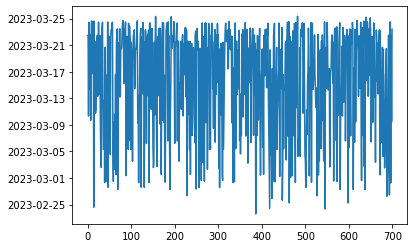

In [56]:
plt.plot(all_vac_info['published_at'])
plt.show()

In [59]:
dayned = all_vac_info['published_at'].dt.day_name()

In [62]:
dayned.value_counts()


Tuesday      140
Thursday     134
Friday       130
Monday       127
Wednesday    110
Sunday        32
Saturday      27
Name: published_at, dtype: int64

In [70]:
python_vac = all_vac_info[all_vac_info['description'].str.contains("python")]

In [71]:
python_vac

,id,name,description,published_at,key_skills
122,78460878,Системный аналитик (junior),<p><strong>Описание:</strong></p> <p>В команду...,2023-03-23 15:08:47+03:00,[]
181,78467089,Support-инженер (Junior),<p> </p> <p><strong>Основные функции и задачи:...,2023-03-23 16:29:18+03:00,[]
191,78097813,Стажер Sber AI Lab,<p>Лаборатория искусственного интеллекта специ...,2023-03-15 15:59:35+03:00,[]
222,78147020,Python разработчик,<p>Приглашаем принять участие в конкурсе на ва...,2023-03-16 15:49:30+03:00,[]
448,77601725,Системный администратор,"<p>Мы – сплоченная команда единомышленников, к...",2023-03-02 14:15:25+03:00,[{'name': 'Администрирование сетевого оборудов...
585,77872224,Стажер в Sber AI Lab,<p>Исследуй новые технологии в области рекомен...,2023-03-10 11:00:51+03:00,[]
632,77759165,Стажер Sber AI Lab (recsys),<p>Исследуй новые технологии в области рекомен...,2023-03-07 12:18:19+03:00,[]
642,78518083,Data Science Specialist (Time Series),"<p>Мы команда AI в SberНадежности, занимаемся ...",2023-03-24 15:10:11+03:00,[]
653,78387709,Data Scientist в команду лояльности СберСпасибо,<p>Мы ищем талантливого молодого ML-разработчи...,2023-03-22 09:31:45+03:00,"[{'name': 'ML-модель'}, {'name': 'Kaggle'}, {'..."
662,78157240,Аналитик данных в Отдел маркетинговых исследов...,"<p>В Управление стратегического маркетинга, От...",2023-03-17 01:40:17+03:00,[]


In [73]:
python_v = pd.DataFrame(python_vac, columns = ['id','name','description','published_at','key_skills'])

In [74]:
python_v

,id,name,description,published_at,key_skills
122,78460878,Системный аналитик (junior),<p><strong>Описание:</strong></p> <p>В команду...,2023-03-23 15:08:47+03:00,[]
181,78467089,Support-инженер (Junior),<p> </p> <p><strong>Основные функции и задачи:...,2023-03-23 16:29:18+03:00,[]
191,78097813,Стажер Sber AI Lab,<p>Лаборатория искусственного интеллекта специ...,2023-03-15 15:59:35+03:00,[]
222,78147020,Python разработчик,<p>Приглашаем принять участие в конкурсе на ва...,2023-03-16 15:49:30+03:00,[]
448,77601725,Системный администратор,"<p>Мы – сплоченная команда единомышленников, к...",2023-03-02 14:15:25+03:00,[{'name': 'Администрирование сетевого оборудов...
585,77872224,Стажер в Sber AI Lab,<p>Исследуй новые технологии в области рекомен...,2023-03-10 11:00:51+03:00,[]
632,77759165,Стажер Sber AI Lab (recsys),<p>Исследуй новые технологии в области рекомен...,2023-03-07 12:18:19+03:00,[]
642,78518083,Data Science Specialist (Time Series),"<p>Мы команда AI в SberНадежности, занимаемся ...",2023-03-24 15:10:11+03:00,[]
653,78387709,Data Scientist в команду лояльности СберСпасибо,<p>Мы ищем талантливого молодого ML-разработчи...,2023-03-22 09:31:45+03:00,"[{'name': 'ML-модель'}, {'name': 'Kaggle'}, {'..."
662,78157240,Аналитик данных в Отдел маркетинговых исследов...,"<p>В Управление стратегического маркетинга, От...",2023-03-17 01:40:17+03:00,[]


In [86]:
python_v['key_skills']

122                                                   []
181                                                   []
191                                                   []
222                                                   []
448    [{'name': 'Администрирование сетевого оборудов...
585                                                   []
632                                                   []
642                                                   []
653    [{'name': 'ML-модель'}, {'name': 'Kaggle'}, {'...
662                                                   []
Name: key_skills, dtype: object

In [78]:
python_v.keys()

Index(['id', 'name', 'description', 'published_at', 'key_skills'], dtype='object')

In [132]:
python_v.key_skills.apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,{'name': 'Администрирование сетевого оборудова...,{'name': 'Linux'},{'name': 'Настройка ПК'},{'name': 'Настройка сетевых подключений'},NaN,NaN,NaN,NaN,NaN,NaN
585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653,{'name': 'ML-модель'},{'name': 'Kaggle'},{'name': 'СберСпасибо'},{'name': 'МФТИ'},{'name': 'SQL'},{'name': 'Python'},{'name': 'Машинное обучение'},{'name': 'Data Analysis'},{'name': 'Big Data'},{'name': 'data'}
662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
print (python_v.loc[:,'key_skills'].values.tolist())



[[], [], [], [], [{'name': 'Администрирование сетевого оборудования'}, {'name': 'Linux'}, {'name': 'Настройка ПК'}, {'name': 'Настройка сетевых подключений'}], [], [], [], [{'name': 'ML-модель'}, {'name': 'Kaggle'}, {'name': 'СберСпасибо'}, {'name': 'МФТИ'}, {'name': 'SQL'}, {'name': 'Python'}, {'name': 'Машинное обучение'}, {'name': 'Data Analysis'}, {'name': 'Big Data'}, {'name': 'data'}], []]


In [171]:
new_df = python_v.explode('key_skills')
tmp = pd.DataFrame(list(new_df.pop('key_skills')),columns = ['skill'])


In [175]:
#tmp
key_skill = pd.DataFrame(tmp.skill.apply(pd.Series))

In [185]:
#key_skill
key_skill.name.value_counts()


Big Data                                   1
МФТИ                                       1
data                                       1
ML-модель                                  1
Настройка ПК                               1
Kaggle                                     1
Администрирование сетевого оборудования    1
Машинное обучение                          1
Linux                                      1
Data Analysis                              1
Python                                     1
SQL                                        1
Настройка сетевых подключений              1
СберСпасибо                                1
Name: name, dtype: int64

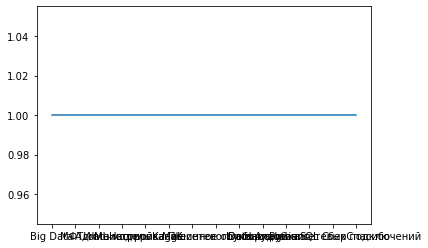

In [217]:
#не поняла как тут сделать значения внизу, чтобы они друг на друга не накладывались
import matplotlib.pyplot as plt
plt.plot(key_skill.name.value_counts())
plt.show()